# Decision Trees (DT) as a classifier
[Tutorial](http://www.thegrimmscientist.com/tutorial-decision-trees/)



A decision tree (DT) has a structure that looks like a flowchart graph where:

- each inner node has a threshold-based test for a specific feature, 
- each branch represents the outcome of the test,
- leaf nodes represent class labels, 
- the entire path starting from root until reaching the leaf represents classification rules. 


Tree-based learning algorithms are considered to be one of the best and mostly used supervised learning methods as:

- they offer models that are highly accurate, 
- stable, 
- and easily interpreted as they are very close to human logic.  


# Classification (a practical example with the iris dataset)

Dataset [description](http://archive.ics.uci.edu/ml/datasets/Iris/)

##  Loading the Iris dataset using sklearn 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# setting style for plots
plt.style.use('seaborn')

iris = datasets.load_iris()

X = iris.data[:, 2:]

y = iris.target

## Let's split the data into train and test sets


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

## Training DT with Iris dataset

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, random_state = 1)

dt = dt_tree.fit(X_train, y_train)

## Visualizing Decision Tree Model Decision Boundaries

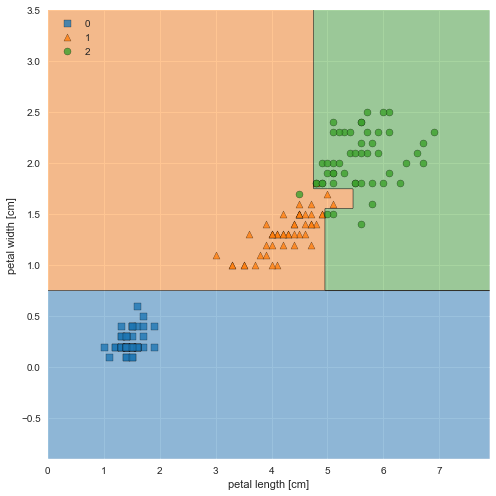

In [6]:
import subprocess
import sys

# If a package (library) is not available, call this function with the name of the missing library
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    
install("mlxtend")

from mlxtend.plotting import plot_decision_regions

X_combined = np.vstack((X_train, X_test))

y_combined = np.hstack((y_train, y_test))

fig, ax = plt.subplots(figsize=(7, 7))

plot_decision_regions(X_combined, y_combined, clf = dt_tree)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

## Visualizing Decision Tree in the Tree Structure

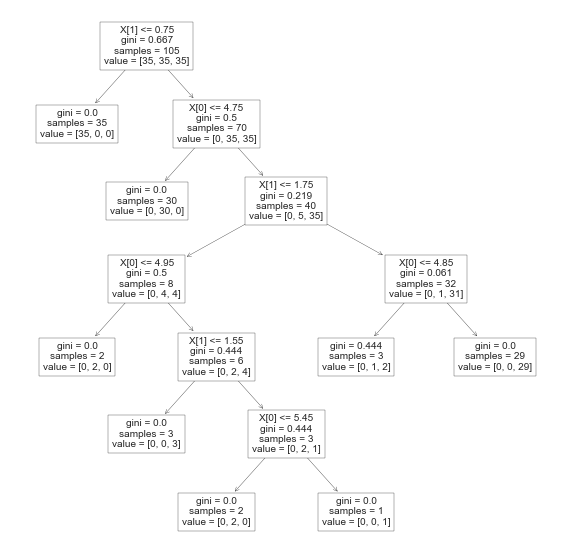

In [7]:
from sklearn import tree

fig, ax = plt.subplots(figsize =(10, 10))

tree.plot_tree(dt_tree, fontsize = 10)
plt.show()

In [8]:
from sklearn.metrics import classification_report

# fitting and predicting the data
y_pred = dt.fit(X_train, y_train).predict(X_test)

# printing classification performances
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Grid search optimization

In [9]:
from sklearn.model_selection import GridSearchCV


"""
criterion: {“gini”, “entropy”}, default=”gini”
    The function to measure the quality of a split. 
    Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.


splitter: {“best”, “random”}, default=”best”
    The strategy used to choose the split at each node.
    
max_depth: int, default=None
    The maximum depth of the tree
"""

hyper_params = {
                'criterion': ['gini', 'entropy'],
                'splitter' : ['best', 'random'],
                'max_depth': range(1, 10)
                }

grid = GridSearchCV(DecisionTreeClassifier(), hyper_params)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [10]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}

In [11]:
dt_model = DecisionTreeClassifier(criterion = grid.best_params_['criterion'], splitter = grid.best_params_['splitter'], max_depth = grid.best_params_['max_depth'])
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



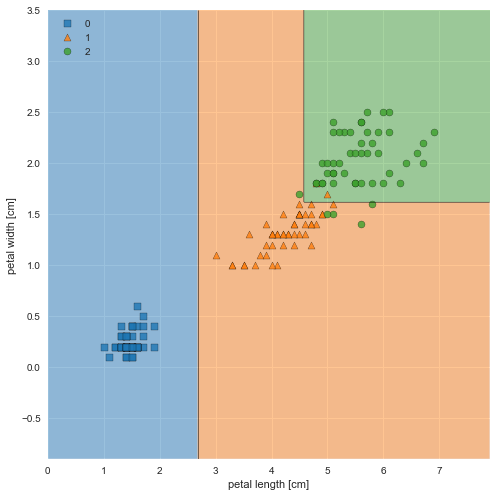

In [10]:
X_combined = np.vstack((X_train, X_test))

y_combined = np.hstack((y_train, y_test))

fig, ax = plt.subplots(figsize=(7, 7))

plot_decision_regions(X_combined, y_combined, clf = dt_model)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

## Hyperparameter optimizing based on classification accuracy

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

accuracy_scores = []
max_depths = []

for max_depth in range(1, 16):
    model = DecisionTreeClassifier(max_depth = max_depth)
    model.fit(X_train, y_train)
    
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    max_depths.append(max_depth)
    accuracy_scores.append(test_accuracy)
    
plt.figure(figsize = (10, 10))
ax = sns.lineplot(x=max_depths, y=accuracy_scores)
ax.set(xlabel='Max Depth', ylabel='Accuracy')
print(f'Best accuracy score {max(accuracy_scores)} achieved at max depth {max_depths[np.argmax(accuracy_scores)]}')

Best accuracy score 0.9777777777777777 achieved at max depth 3


## Drawing the confusion matrix 

Confusion matrix, without normalization
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


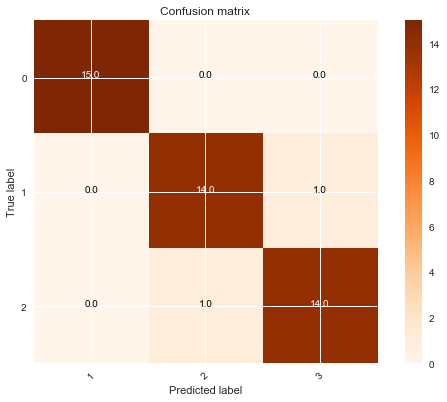

In [12]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Oranges):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[1])
    plt.xticks(tick_marks, rotation=45)
    ax = plt.gca()
    ax.set_xticklabels((ax.get_xticks() +1).astype(str))
    plt.yticks(tick_marks)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.1f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision= 1 )
print('Confusion matrix, without normalization')
print(cm)
fig, ax = plt.subplots()
plot_confusion_matrix(cm)

plt.show()

# Support Vector Machines (SVM) as a classifier

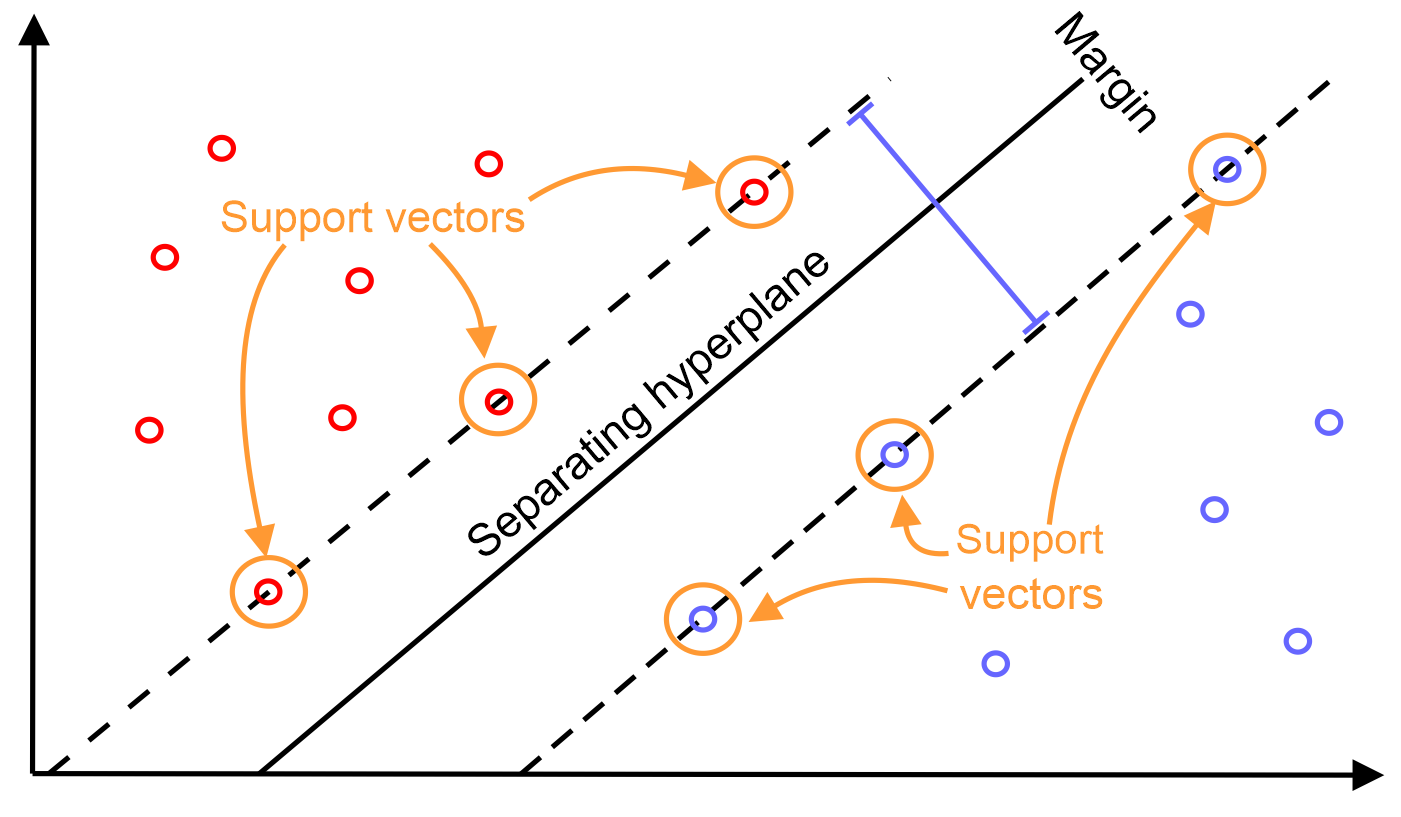

## Let's use the Breast cancer dataset with a Linear SVM 

For the linear kernel we can try optimizing the C regularization parameter

In [20]:
breast_cancer = datasets.load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Training of SVC and hyperparameter optimization based on the classification accuracy

Best accuracy score 0.9766081871345029 achieved at C 2.1110526315789473


SVC(C=2.1110526315789473, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

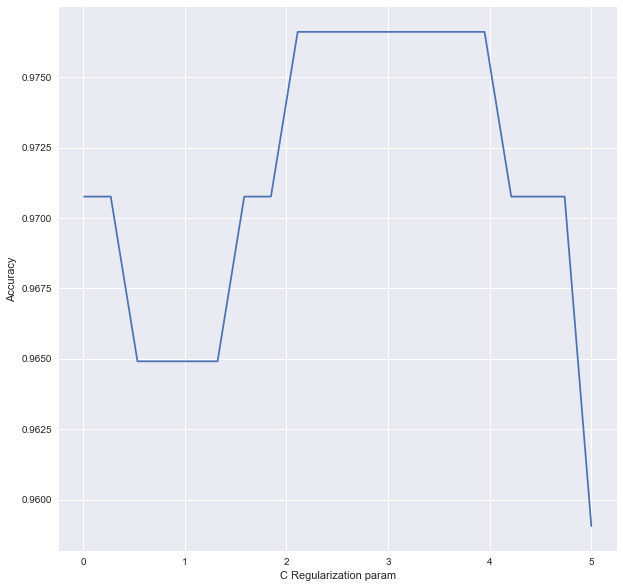

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns

accuracy_scores = []
Cs = []

for C in np.linspace(0.01, 5, 20):
    model = SVC(C = C, kernel = 'linear')
    model.fit(X_train, y_train)
    
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    Cs.append(C)
    accuracy_scores.append(test_accuracy)
    
plt.figure(figsize = (10, 10))
ax = sns.lineplot(x = Cs, y = accuracy_scores)
ax.set(xlabel = 'C Regularization param', ylabel = 'Accuracy')
print(f'Best accuracy score {max(accuracy_scores)} achieved at C {Cs[np.argmax(accuracy_scores)]}')

svm_model = SVC(C = Cs[np.argmax(accuracy_scores)], kernel = 'linear')
svm_model.fit(X_train, y_train)

## classification report

In [18]:
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Building the confusion matrix

Confusion matrix, without normalization
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


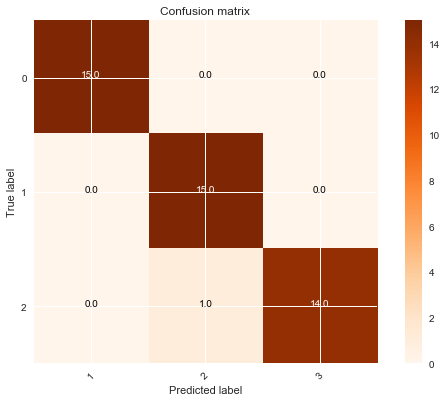

In [19]:
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision= 1 )
print('Confusion matrix, without normalization')
print(cm)
fig, ax = plt.subplots()
plot_confusion_matrix(cm)

plt.show()